In [ ]:
import numpy as np
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import tensorflow as tf

In [ ]:
def load_data_from_mat(file_path, key):
    data = loadmat(file_path)
    return data[key]


In [ ]:
# Define paths and keys for each class
file_info_dict = {
    'A': [('/content/drive/MyDrive/emdvmd/VMDF.mat', 'IMFvmd1F')],
    'B': [('/content/drive/MyDrive/emdvmd/VMDN.mat', 'IMFvmd1N')],
    'C': [('/content/drive/MyDrive/emdvmd/VMDO.mat', 'IMFvmd1O')],
    'D': [('/content/drive/MyDrive/emdvmd/VMDS.mat', 'IMFvmd1S')],
    'E': [('/content/drive/MyDrive/emdvmd/VMDZ.mat', 'IMFvmd1Z')]
}

In [ ]:
def prepare_data_for_classification(classes):
    X, y = [], []
    for label, class_id in enumerate(classes):
        file_info = file_info_dict[class_id]  # Get file paths and keys for each class
        for file_path, key in file_info:
            data = load_data_from_mat(file_path, key)
            X.append(data)
            y.append(np.array([label] * data.shape[0]))  # Assign the same label to all samples
    X = np.concatenate(X)
    y = np.concatenate(y)
    return X, y


In [ ]:
def create_cnn_model(input_shape, filters, kernel_size, pool_size, dense_units1, dense_units2, output_units, dropout_rate):
    model = Sequential()
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Flatten())
    model.add(Dense(units=dense_units1, activation='relu'))
    model.add(Dropout(rate=dropout_rate))
    model.add(Dense(units=dense_units2, activation='relu'))
    model.add(Dropout(rate=dropout_rate))
    model.add(Dense(units=output_units, activation='sigmoid'))  # Binary classification (sigmoid output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Plot confusion matrix function
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
# Plot accuracy and loss
def plot_training_history(history):
    # Accuracy plot
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy over Epochs')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss over Epochs')

    plt.show()

In [ ]:
def compute_metrics(y_true, y_pred):
    y_true = np.argmax(y_true, axis=1)
    y_pred = np.argmax(y_pred, axis=1)
    accuracy = accuracy_score(y_true, y_pred)
    sensitivity = recall_score(y_true, y_pred, average='macro')
    specificity = recall_score(y_true, y_pred, average='macro', labels=[0, 1])
    f1 = f1_score(y_true, y_pred, average='macro')
    return accuracy, sensitivity, specificity, f1

In [ ]:

# Train and evaluate CNN model with added early stopping and time computation
def train_and_evaluate_cnn_model(X_train, y_train, X_test, y_test, filters, kernel_size, pool_size, dense_units1, dense_units2, dropout_rate, batch_size, epochs):
    # Create model
    model = create_cnn_model((X_train.shape[1], 1), filters, kernel_size, pool_size, dense_units1, dense_units2, 1, dropout_rate)


    # Display the model architecture
    model.summary()

    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Start training time
    start_time = time.time()

    # Train model
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping], verbose=1)

    # End training time
    end_time = time.time()

    # Evaluate the model
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Compute accuracy, sensitivity, specificity, f1-score
    accuracy = accuracy_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred)
    specificity = recall_score(y_test, y_pred, pos_label=0)
    f1 = f1_score(y_test, y_pred)

    # Print metrics
    print(f'Test accuracy: {accuracy}')
    print(f'Sensitivity (Recall): {sensitivity}')
    print(f'Specificity: {specificity}')
    print(f'F1 Score: {f1}')

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred)

    # Plot training history (accuracy/loss)
    plot_training_history(history)

    # Print training time
    print(f"Training time: {end_time - start_time:.2f} seconds")


Classification A-B vs. C-D-E

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)                    │ (None, 98, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 49, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 410,113 (1.56 MB)

 Trainable params: 410,113 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8536 - loss: 0.2752 - val_accuracy: 0.9948 - val_loss: 0.0172
Epoch 2/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9940 - loss: 0.0235 - val_accuracy: 0.9963 - val_loss: 0.0141
Epoch 3/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9963 - loss: 0.0155 - val_accuracy: 0.9896 - val_loss: 0.0368
Epoch 4/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9952 - loss: 0.0149 - val_accuracy: 0.9960 - val_loss: 0.0156
Epoch 5/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9956 - loss: 0.0126 - val_accuracy: 0.9963 - val_loss: 0.0169
Epoch 6/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9962 - loss: 0.0127 - val_accuracy: 0.9979 - val_loss: 0.0110
Epoch 7/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9978 - loss: 0.0085 - val_accuracy: 0.9982 - val_loss: 0.0119
Epoch 8/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9969 - loss: 0.0086 - val_accuracy:

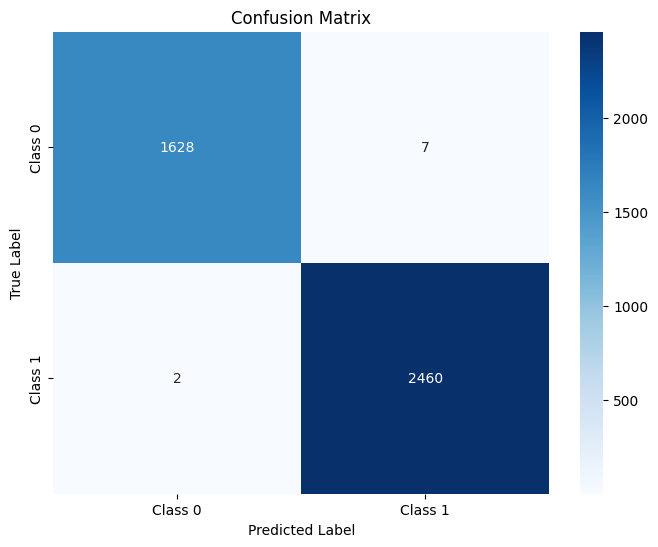

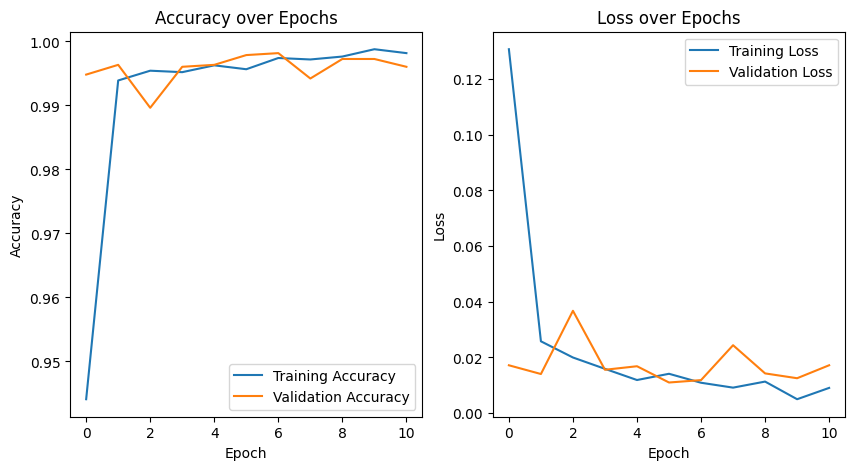

Training time: 65.38 seconds


In [ ]:
# Load and preprocess data for classes A-B vs. C-D-E
classes_ab = ['A', 'B']
classes_cde = ['C', 'D', 'E']

X_ab, y_ab = prepare_data_for_classification(classes_ab)
X_cde, y_cde = prepare_data_for_classification(classes_cde)

# Merge and create new labels
X = np.concatenate([X_ab, X_cde])
y = np.concatenate([np.zeros(len(y_ab)), np.ones(len(y_cde))])  # 0 for A-B, 1 for C-D-E

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape data for CNN
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate the CNN model
train_and_evaluate_cnn_model(X_train, y_train, X_test, y_test, filters=64, kernel_size=3, pool_size=2, dense_units1=128, dense_units2=64, dropout_rate=0.5, batch_size=32, epochs=20)


Classification A vs. E

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 98, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 49, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 410,113 (1.56 MB)

 Trainable params: 410,113 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8176 - loss: 0.3497 - val_accuracy: 0.9886 - val_loss: 0.0299
Epoch 2/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9892 - loss: 0.0337 - val_accuracy: 0.9962 - val_loss: 0.0110
Epoch 3/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9976 - loss: 0.0128 - val_accuracy: 0.9992 - val_loss: 0.0020
Epoch 4/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9965 - loss: 0.0095 - val_accuracy: 0.9977 - val_loss: 0.0062
Epoch 5/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9961 - loss: 0.0087 - val_accuracy: 0.9977 - val_loss: 0.0047
Epoch 6/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9989 - loss: 0.0066 - val_accuracy: 0.9977 - val_loss: 0.0031
Epoch 7/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9989 - loss: 0.0037 - val_accuracy: 0.9985 - val_loss: 0.0019
Epoch 8/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9977 - loss: 0.0111 - val_accuracy:

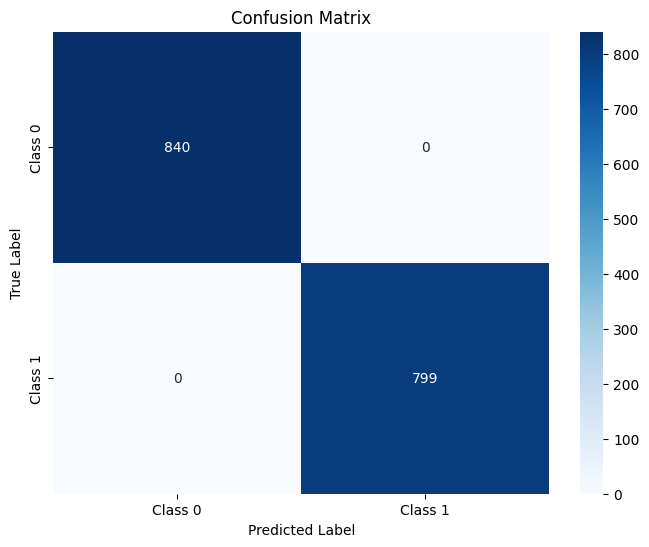

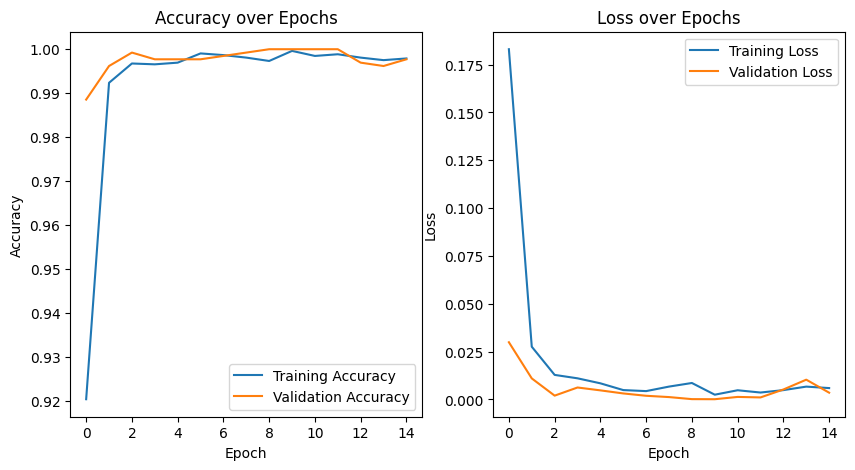

Training time: 35.36 seconds


In [ ]:
# Example: Load and preprocess data for classes A vs. E (binary classification)
classes_a = ['A']
classes_e = ['E']

X_a, y_a = prepare_data_for_classification(classes_a)
X_e, y_e = prepare_data_for_classification(classes_e)

# Merge and create new labels (binary classification)
X = np.concatenate([X_a, X_e])
y = np.concatenate([np.zeros(len(y_a)), np.ones(len(y_e))])  # 0 for A, 1 for E

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape data for CNN
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate the CNN model
train_and_evaluate_cnn_model(X_train, y_train, X_test, y_test, filters=64, kernel_size=3, pool_size=2, dense_units1=128, dense_units2=64, dropout_rate=0.5, batch_size=32, epochs=20)

Classification B vs. E

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 98, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 49, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 410,113 (1.56 MB)

 Trainable params: 410,113 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8006 - loss: 0.3743 - val_accuracy: 0.9954 - val_loss: 0.0179
Epoch 2/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9897 - loss: 0.0314 - val_accuracy: 0.9931 - val_loss: 0.0138
Epoch 3/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9961 - loss: 0.0142 - val_accuracy: 0.9962 - val_loss: 0.0145
Epoch 4/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9957 - loss: 0.0165 - val_accuracy: 0.9985 - val_loss: 0.0048
Epoch 5/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9984 - loss: 0.0061 - val_accuracy: 0.9992 - val_loss: 0.0032
Epoch 6/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9974 - loss: 0.0107 - val_accuracy: 0.9977 - val_loss: 0.0048
Epoch 7/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9980 - loss: 0.0058 - val_accuracy: 0.9992 - val_loss: 0.0037
Epoch 8/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9992 - loss: 0.0033 - val_accuracy: 0

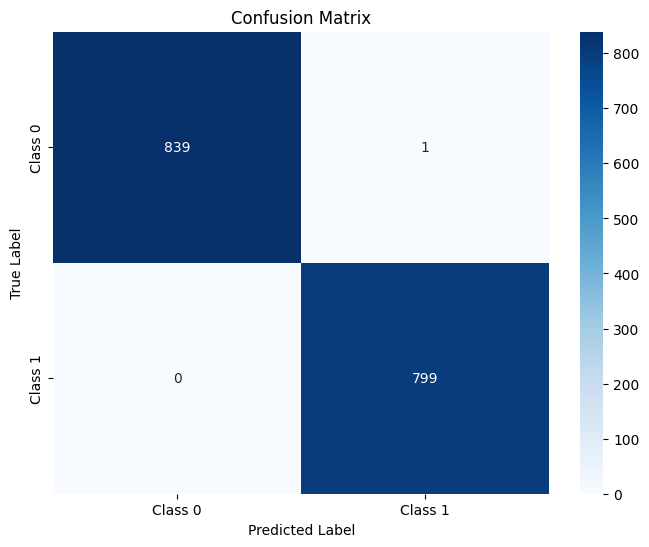

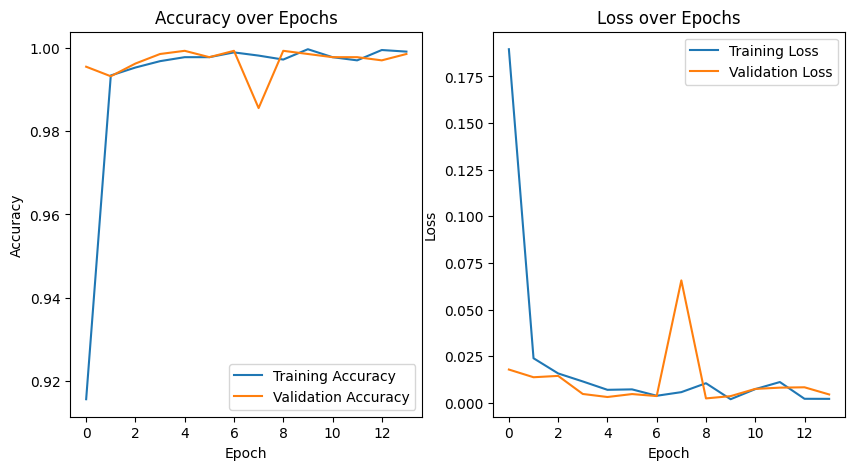

Training time: 33.74 seconds


In [ ]:
# Load and preprocess data for classes B vs. E
classes_b = ['B']
classes_e = ['E']

X_b, y_b = prepare_data_for_classification(classes_b)
X_e, y_e = prepare_data_for_classification(classes_e)

# Merge and create new labels
X = np.concatenate([X_b, X_e])
y = np.concatenate([np.zeros(len(y_b)), np.ones(len(y_e))])  # 0 for B, 1 for E

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape data for CNN
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate the CNN model
train_and_evaluate_cnn_model(X_train, y_train, X_test, y_test, filters=64, kernel_size=3, pool_size=2, dense_units1=128, dense_units2=64, dropout_rate=0.5, batch_size=32, epochs=20)


Classification B vs. D

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)                    │ (None, 98, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 49, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 410,113 (1.56 MB)

 Trainable params: 410,113 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8368 - loss: 0.2760 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 2/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9993 - loss: 0.0066 - val_accuracy: 1.0000 - val_loss: 5.1549e-05
Epoch 3/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 1.0000 - loss: 6.0795e-04 - val_accuracy: 1.0000 - val_loss: 4.3061e-06
Epoch 4/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9995 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 6.7522e-07
Epoch 5/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 1.4223e-04 - val_accuracy: 1.0000 - val_loss: 3.2609e-07
Epoch 6/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 1.0000 - loss: 7.6536e-05 - val_accuracy: 1.0000 - val_loss: 9.8693e-08
Epoch 7/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 2.3693e-04 - val_accuracy: 1.0000 - val_loss: 1.0740e-07
Epoch 8/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accurac

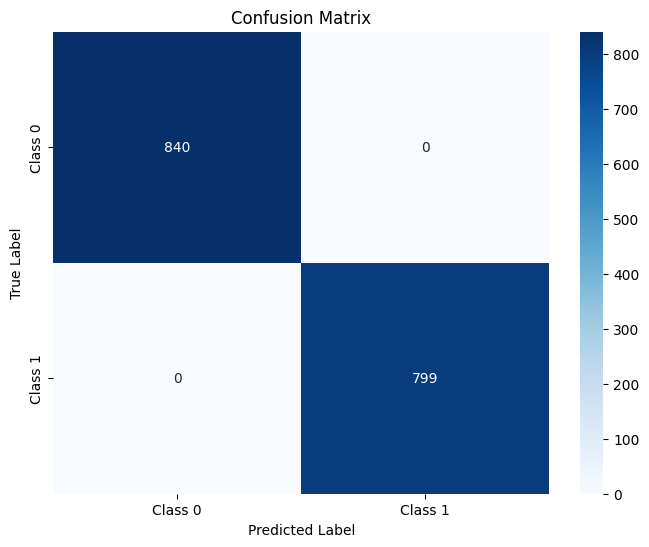

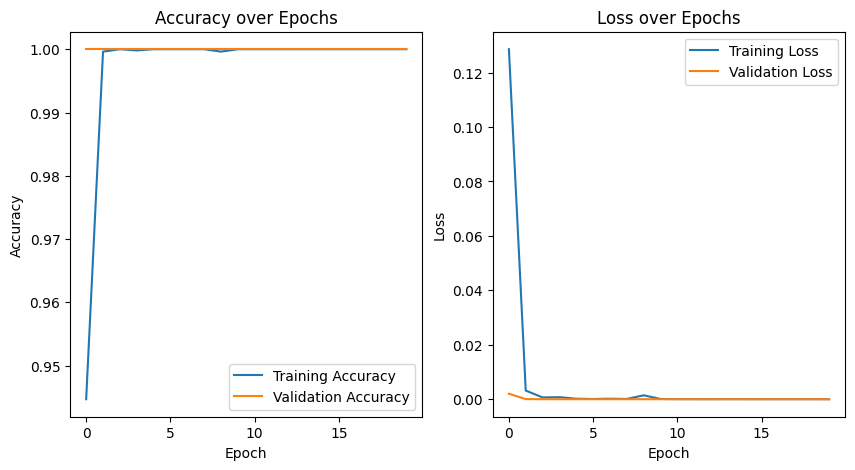

Training time: 42.13 seconds


In [ ]:
# Load and preprocess data for classes B vs. D
classes_b = ['B']
classes_d = ['D']

X_b, y_b = prepare_data_for_classification(classes_b)
X_d, y_d = prepare_data_for_classification(classes_d)

# Merge and create new labels
X = np.concatenate([X_b, X_d])
y = np.concatenate([np.zeros(len(y_b)), np.ones(len(y_d))])  # 0 for B, 1 for D

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape data for CNN
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train and evaluate the CNN model
train_and_evaluate_cnn_model(X_train, y_train, X_test, y_test, filters=64, kernel_size=3, pool_size=2, dense_units1=128, dense_units2=64, dropout_rate=0.5, batch_size=32, epochs=20)


Classification A vs. C


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)                    │ (None, 98, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 49, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 410,113 (1.56 MB)

 Trainable params: 410,113 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8245 - loss: 0.3092 - val_accuracy: 0.9939 - val_loss: 0.0213
Epoch 2/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9951 - loss: 0.0227 - val_accuracy: 0.9992 - val_loss: 0.0019
Epoch 3/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9988 - loss: 0.0053 - val_accuracy: 1.0000 - val_loss: 6.0515e-04
Epoch 4/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9998 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 3.4877e-04
Epoch 5/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9983 - loss: 0.0067 - val_accuracy: 0.9992 - val_loss: 8.9793e-04
Epoch 6/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9992 - loss: 0.0030 - val_accuracy: 0.9992 - val_loss: 0.0018
Epoch 7/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9981 - loss: 0.0064 - val_accuracy: 1.0000 - val_loss: 1.2742e-04
Epoch 8/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9997 - loss: 0.0011

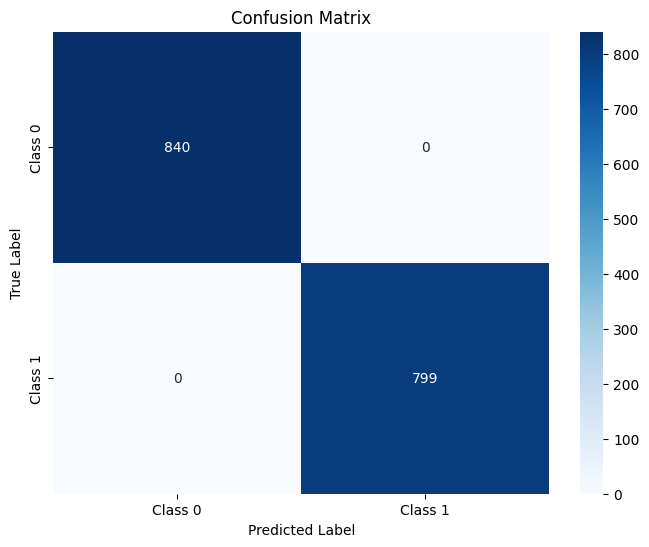

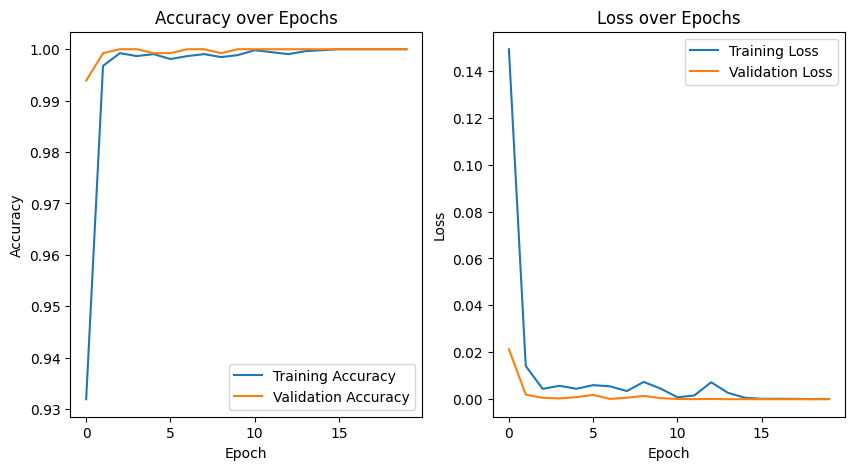

Training time: 43.36 seconds


In [ ]:
# Load and preprocess data for classes A vs. C
classes_a = ['A']
classes_c = ['C']

X_a, y_a = prepare_data_for_classification(classes_a)
X_c, y_c = prepare_data_for_classification(classes_c)

# Merge and create new labels
X = np.concatenate([X_a, X_c])
y = np.concatenate([np.zeros(len(y_a)), np.ones(len(y_c))])  # 0 for A, 1 for C

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape data for CNN
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate the CNN model
train_and_evaluate_cnn_model(X_train, y_train, X_test, y_test, filters=64, kernel_size=3, pool_size=2, dense_units1=128, dense_units2=64, dropout_rate=0.5, batch_size=32, epochs=20)

Classification C vs. E

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)                    │ (None, 98, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 49, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 410,113 (1.56 MB)

 Trainable params: 410,113 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7954 - loss: 0.3840 - val_accuracy: 0.9771 - val_loss: 0.0639
Epoch 2/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9815 - loss: 0.0486 - val_accuracy: 0.9931 - val_loss: 0.0158
Epoch 3/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9902 - loss: 0.0284 - val_accuracy: 0.9954 - val_loss: 0.0106
Epoch 4/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9942 - loss: 0.0159 - val_accuracy: 0.9947 - val_loss: 0.0091
Epoch 5/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9979 - loss: 0.0065 - val_accuracy: 0.9992 - val_loss: 0.0034
Epoch 6/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9972 - loss: 0.0106 - val_accuracy: 0.9969 - val_loss: 0.0066
Epoch 7/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9992 - loss: 0.0056 - val_accuracy: 0.9985 - val_loss: 0.0039
Epoch 8/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9985 - loss: 0.0080 - val_accurac

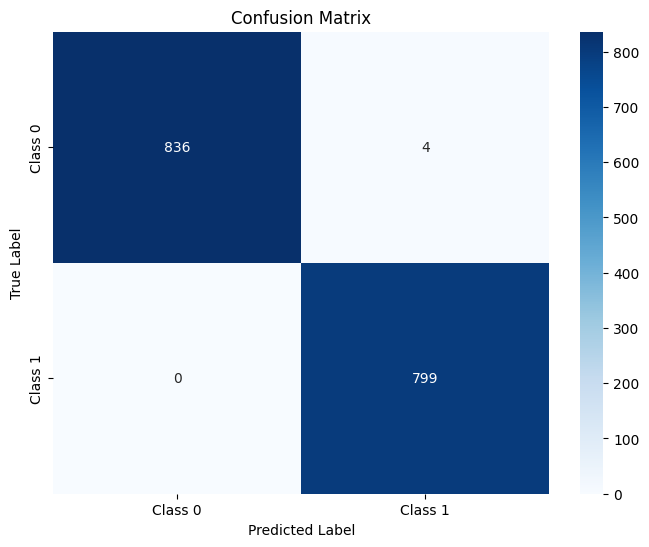

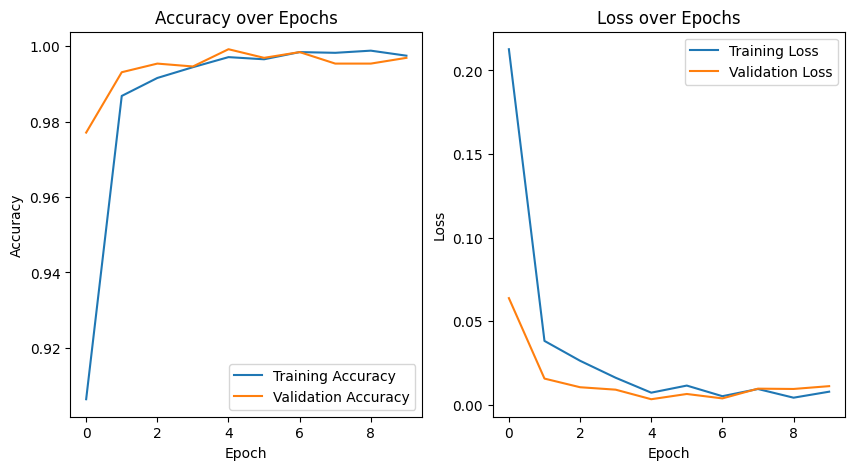

Training time: 24.50 seconds


In [ ]:
# Load and preprocess data for classes C vs. E
classes_c = ['C']
classes_e = ['E']

X_c, y_c = prepare_data_for_classification(classes_c)
X_e, y_e = prepare_data_for_classification(classes_e)

# Merge and create new labels
X = np.concatenate([X_c, X_e])
y = np.concatenate([np.zeros(len(y_c)), np.ones(len(y_e))])  # 0 for C, 1 for E

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape data for CNN
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate the CNN model
train_and_evaluate_cnn_model(X_train, y_train, X_test, y_test, filters=64, kernel_size=3, pool_size=2, dense_units1=128, dense_units2=64, dropout_rate=0.5, batch_size=32, epochs=20)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')